<a href="https://colab.research.google.com/github/SergeiVKalinin/MSE_Fall2024/blob/main/Module_5/19_Contextual_Bandits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutorial notebook for the Fall 2024 Course "Machine Learning for Materials Science", University of Tennessee Knoxville, Department of Materials Science and Engineering.



https://subscription.packtpub.com/book/data/9781838644147

Mastering Reinforcement Learning with Python
By Enes Bilgin, December 2020

# Multiarmed Bandits

First, let's create a simple Gaussian Bandit, a single slot machine.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Class for a single slot machine. Rewards are Gaussian.
# Note that we round the winnings down to one significant digit

class GaussianBandit(object):

    def __init__(self, mean=0, stdev=1):
        self.mean = mean
        self.stdev = stdev

    def pull_lever(self):
        reward = np.random.normal(self.mean, self.stdev)
        return np.round(reward, 1)

We can name him Bobby. Bobby is configured to give a reward with mean of 3 and distribution of 1.

In [2]:
bobby = GaussianBandit(10,1)
bobby.pull_lever()

8.6

Now, let's play n_games with Bobby and plot our reward as a function of time and its distribution. Unsurprisingly, the rewards follow Gaussian distribution(if we play enough games).

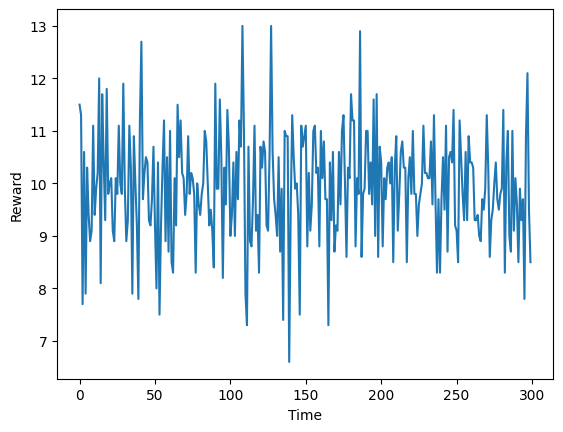

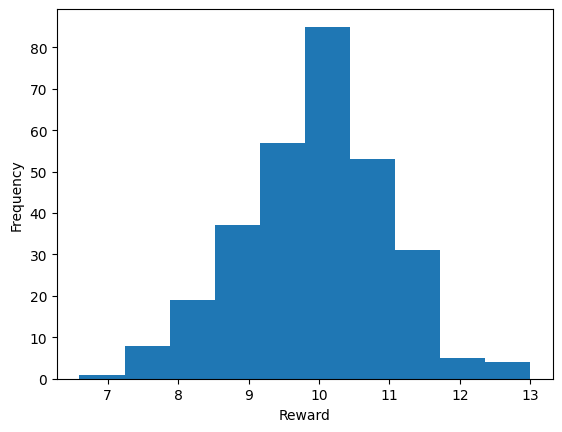

In [3]:
n_games = 300
rewards = []

for t in range(n_games):
    reward = bobby.pull_lever()
    rewards.append(reward)

# plot reward as a function of time
plt.plot(range(n_games), rewards)
plt.xlabel('Time')
plt.ylabel('Reward')
plt.show()

# provide the histogram of the rewards
plt.hist(rewards)
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.show()

Now, let's set the Casino. Now we can initialize several slot machines with different reward distribution.

In [4]:
class GaussianBanditGame(object):

    def __init__(self, bandits):
        self.bandits = bandits
        np.random.shuffle(self.bandits)
        self.reset_game()

    def play(self, choice):
        reward = self.bandits[choice - 1].pull_lever()
        self.rewards.append(reward)
        self.total_reward += reward
        self.n_played += 1
        return reward

    def user_play(self):
        self.reset_game()
        print("Game started. " +
              "Enter 0 as input to end the game.")

        while True:
            print(f"\n -- Round {self.n_played}")
            choice = int(input(f"Choose a machine " +
                     f"from 1 to {len(self.bandits)}: "))
            if choice in range(1, len(self.bandits) + 1):
                reward = self.play(choice)
                print(f"Machine {choice} gave " +
                      f"a reward of {reward}.")
                avg_rew = self.total_reward/self.n_played
                print(f"Your average reward " +
                      f"so far is {avg_rew}.")
            else:
                break
        print("Game has ended.")

        if self.n_played > 0:
            print(f"Total reward is {self.total_reward}" +
                  f" after {self.n_played} round(s).")
            avg_rew = self.total_reward/self.n_played
            print(f"Average reward is {avg_rew}.")

    def reset_game(self):
        self.rewards = []
        self.total_reward = 0
        self.n_played = 0

Let's initialize the game with three slot machines, with different reward probabilities.

In [5]:
slotA = GaussianBandit(5, 0.1)
slotB = GaussianBandit(6, 0.1)
slotC = GaussianBandit(1, 5)
game = GaussianBanditGame([slotA, slotB, slotC])

Now, let's play the game with the 3 slot machines choosing the played one randomly.

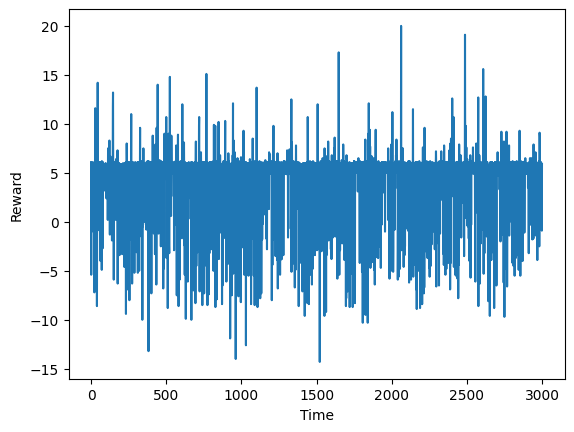

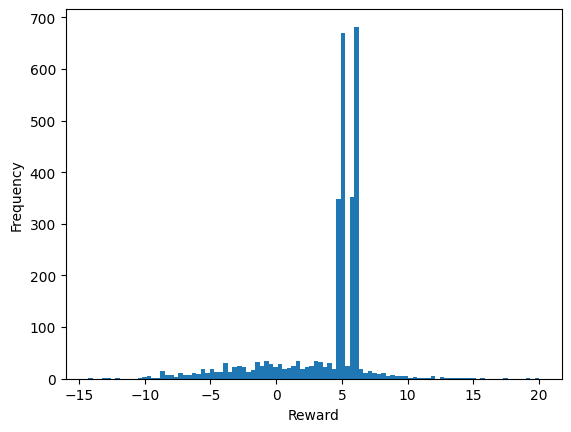

In [6]:
n_games = 3000
rewards = []

for t in range(n_games):
    reward = game.play(np.random.randint(1, 4))
    rewards.append(reward)

# plot reward as a function of time
plt.plot(range(n_games), rewards)
plt.xlabel('Time')
plt.ylabel('Reward')
plt.show()

# provide the histogram of the rewards
plt.hist(rewards, bins = 100)
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.show()

A/B

## A/B/n testing

Now, let's define a Bernoulli Bandit. In this case, we win 1 with probability p and win 0 with probability 1-p, i.e. Bernoulli distribution. This model can be used to describe the probability of one-off events, e.g. click on the ad on the webpage, or success of polyoxometallate synthesis   

In [7]:
class BernoulliBandit(object):

    def __init__(self, p):
        self.p = p

    def display_ad(self):
        reward = np.random.binomial(n=1, p=self.p)
        return reward

In [8]:
adA = BernoulliBandit(0.004)
adB = BernoulliBandit(0.016)
adC = BernoulliBandit(0.02)
adD = BernoulliBandit(0.028)
adE = BernoulliBandit(0.031)
ads = [adA, adB, adC, adD, adE]

Now, let's split our time for ads as test and production.

In [9]:
n_test = 20000
n_prod = 80000
n_ads = len(ads)

Q = np.zeros(n_ads)  # Q, action values
N = np.zeros(n_ads)  # N, total impressions

total_reward = 0
avg_rewards = []  # Save average rewards over time

for i in range(n_test):
    ad_chosen = np.random.randint(n_ads)
    R = ads[ad_chosen].display_ad() # Observe reward
    N[ad_chosen] += 1
    Q[ad_chosen] += (1 / N[ad_chosen]) * (R - Q[ad_chosen])
    total_reward += R
    avg_reward_so_far = total_reward / (i + 1)
    avg_rewards.append(avg_reward_so_far)

In [10]:
Q, R

(array([0.00397516, 0.01579857, 0.0236436 , 0.02933066, 0.03216748]), 0)

In [11]:
best_ad_index = np.argmax(Q)
print("The best performing ad is {}".format(chr(ord('A') + best_ad_index)))

The best performing ad is E


In [12]:
ad_chosen = best_ad_index

for i in range(n_prod):
    R = ads[ad_chosen].display_ad()
    total_reward += R
    avg_reward_so_far = total_reward / (n_test + i + 1)
    avg_rewards.append(avg_reward_so_far)

In [13]:
import pandas as pd
df_reward_comparison = pd.DataFrame(avg_rewards, columns=['A/B/n'])

In [14]:
df_reward_comparison.tail()

,A/B/n
99995,0.029021
99996,0.029021
99997,0.029021
99998,0.029020
99999,0.029020


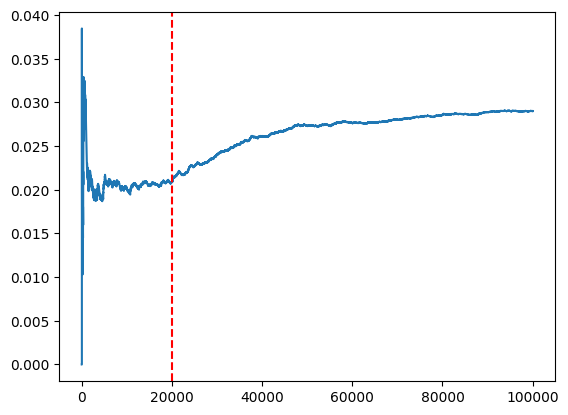

In [15]:
import matplotlib.pyplot as plt

plt.plot(avg_rewards)
plt.axvline(x=n_test, color='r', linestyle='--')
plt.show()

## Epsilon-greedy policy

Now, let's introduce epsilon-greedy policy. Here, epsilon number of times we perform random action, and 1-epsilon number of time swe perform best action. Note that this approach works when number of possible actions is relatively small (eithe rby nature of the problem, or by design).

Note that we are going to compare the epsilon-greedy results with the A/B testing results, so we keep the number of attempts same as for A/B testing. However, we do not have separate test and production stages in this case.

In [16]:
greedy_list = ['e-greedy: 0.01', 'e-greedy: 0.05', 'e-greedy: 0.1', 'e-greedy: 0.5']
greedy_list1 = [0.01, 0.05, 0.1, 0.5]

for eps1 in greedy_list1:

  eps = eps1
  n_prod = 100000
  n_ads = len(ads)
  Q = np.zeros(n_ads)
  N = np.zeros(n_ads)
  total_reward = 0
  avg_rewards = []

  ad_chosen = np.random.randint(n_ads)

  for i in range(n_prod):
    R = ads[ad_chosen].display_ad()
    N[ad_chosen] += 1
    Q[ad_chosen] += (1 / N[ad_chosen]) * (R - Q[ad_chosen])
    total_reward += R
    avg_reward_so_far = total_reward / (i + 1)
    avg_rewards.append(avg_reward_so_far)

    # Select the next ad to display
    if np.random.uniform() <= eps:
        ad_chosen = np.random.randint(n_ads)
    else:
        ad_chosen = np.argmax(Q)

  df_reward_comparison['e-greedy: {}'.format(eps)] = avg_rewards

In [17]:
df_reward_comparison.tail()

,A/B/n,e-greedy: 0.01,e-greedy: 0.05,e-greedy: 0.1,e-greedy: 0.5
99995,0.029021,0.021811,0.027661,0.029071,0.025731
99996,0.029021,0.021811,0.027661,0.029071,0.025731
99997,0.029021,0.021810,0.027661,0.029071,0.025731
99998,0.029020,0.021810,0.027660,0.029070,0.025730
99999,0.029020,0.021810,0.027660,0.029070,0.025730


<Axes: >

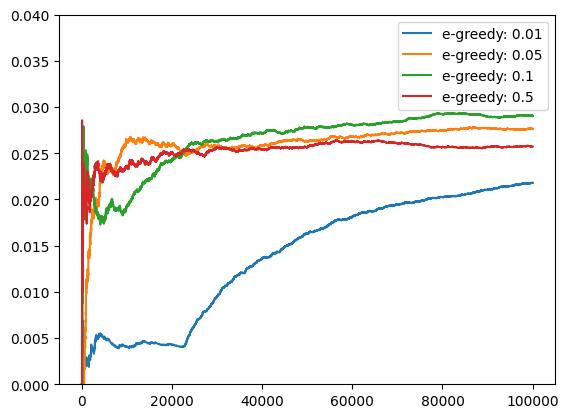

In [18]:
df_reward_comparison[greedy_list].plot(ylim = (0, 0.04))
# df_reward_comparison.plot(ylim = (0, 0.04))

- We can see that if our epsilon is large, our reward converges to lower value (because we keep exploring sub-optimal options).
- If the epsilon is small, then the algorithm learns slower
- For each problem, we find optimal value of epsilon by tuning on simialr data
- Alternatively, we can start with large epsilon value and then make it smaller with time

We can also define ***regret*** as a difference between reward and ideally possible reward.

## Upper Confidence Bound (UCB)

In UCB policy, we associate each choice with uncertainty that changes with the time. The more times we tried some choice, the smaller is the uncertainty. We have a hypoerparameter c that sets the balance between exploration and exploitation.

In [19]:
ucb_list1 = [0.1, 1, 10]

for c1 in ucb_list1:
  c = c1
  n_prod = 100000
  n_ads = len(ads)
  ad_indices = np.array(range(n_ads))
  Q = np.zeros(n_ads)
  N = np.zeros(n_ads)
  total_reward = 0
  avg_rewards = []

  for t in range(1, n_prod + 1):
    if any(N==0):
      ad_chosen = np.random.choice(ad_indices[N==0])
    else:
      uncertainty = np.sqrt(np.log(t) / N)
      ad_chosen = np.argmax(Q + c * uncertainty)

    R = ads[ad_chosen].display_ad()
    N[ad_chosen] += 1
    Q[ad_chosen] += (1 / N[ad_chosen]) * (R - Q[ad_chosen])
    total_reward += R
    avg_reward_so_far = total_reward / t
    avg_rewards.append(avg_reward_so_far)

  df_reward_comparison['UCB, c={}'.format(c)] = avg_rewards

In [20]:
df_reward_comparison.tail()

,A/B/n,e-greedy: 0.01,e-greedy: 0.05,e-greedy: 0.1,e-greedy: 0.5,"UCB, c=0.1","UCB, c=1","UCB, c=10"
99995,0.029021,0.021811,0.027661,0.029071,0.025731,0.030031,0.024091,0.020491
99996,0.029021,0.021811,0.027661,0.029071,0.025731,0.030031,0.024091,0.020491
99997,0.029021,0.021810,0.027661,0.029071,0.025731,0.030031,0.024090,0.020490
99998,0.029020,0.021810,0.027660,0.029070,0.025730,0.030030,0.024090,0.020490
99999,0.029020,0.021810,0.027660,0.029070,0.025730,0.030030,0.024090,0.020490


<Axes: >

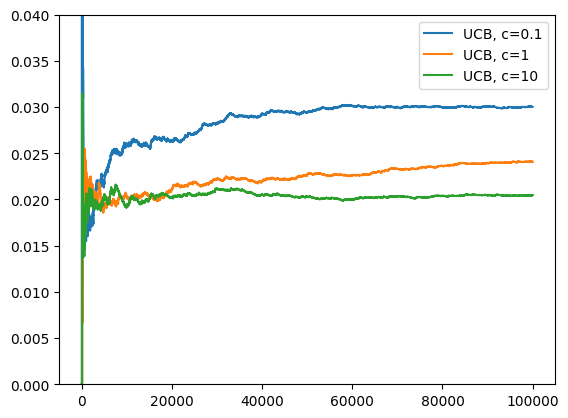

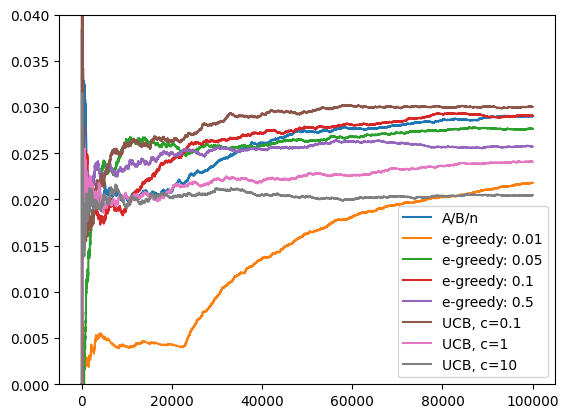

In [21]:
ucb_list = ['UCB, c=0.1', 'UCB, c=1', 'UCB, c=10']
df_reward_comparison[ucb_list].plot(ylim = (0, 0.04))
df_reward_comparison.plot(ylim = (0, 0.04))

## Thompson sampling

In [22]:
n_prod = 100000
n_ads = len(ads)
alphas = np.ones(n_ads)
betas = np.ones(n_ads)
total_reward = 0
avg_rewards = []

for i in range(n_prod):
    theta_samples = [np.random.beta(alphas[k], betas[k]) for k in range(n_ads)]
    ad_chosen = np.argmax(theta_samples)
    R = ads[ad_chosen].display_ad()
    alphas[ad_chosen] += R
    betas[ad_chosen] += 1 - R
    total_reward += R
    avg_reward_so_far = total_reward / (i + 1)
    avg_rewards.append(avg_reward_so_far)
df_reward_comparison['Thompson Sampling'] = avg_rewards

<Axes: >

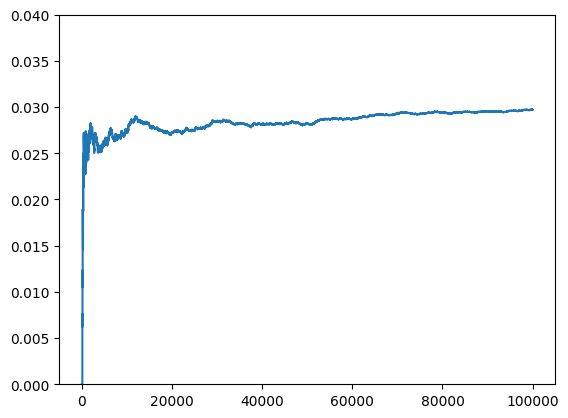

In [23]:
df_reward_comparison['Thompson Sampling'].plot(ylim = (0, 0.04))

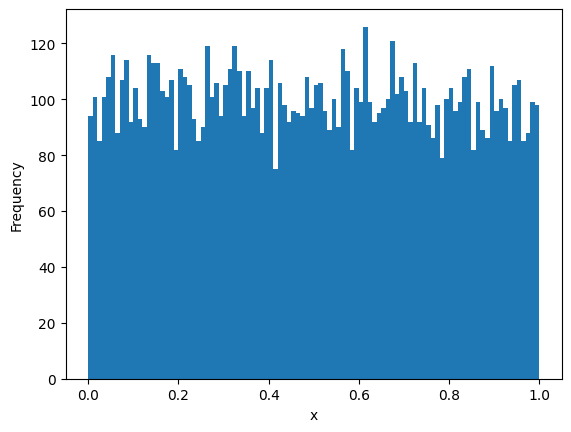

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the parameters of the beta distribution
alpha = 1
beta = 1

# Generate a random sample from the beta distribution
x = np.random.beta(alpha, beta, size=10000)

# Plot the histogram of the sample
plt.hist(x, bins = 100)
plt.xlabel('x')
plt.ylabel('Frequency')
plt.show()


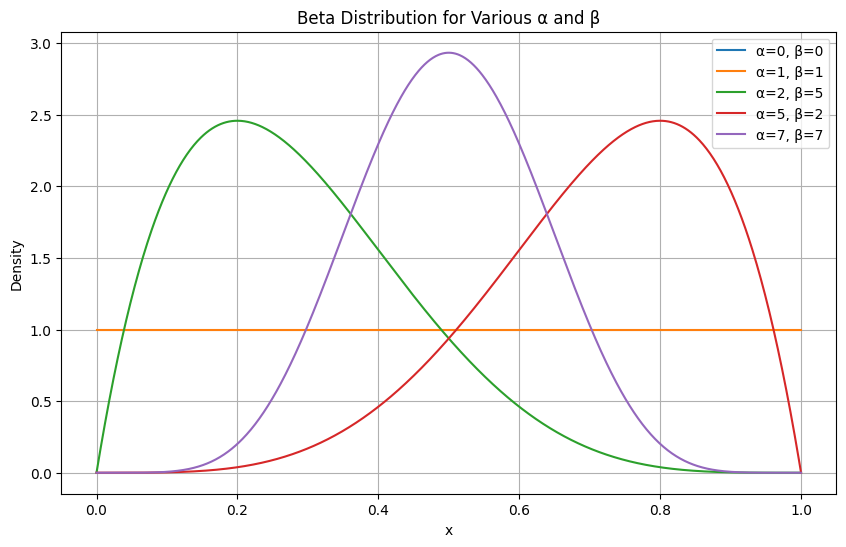

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define parameter sets for alpha and beta
parameters = [
    (0, 0),
    (1, 1),
    (2, 5),
    (5, 2),
    (7, 7)
]

# Generate x values
x = np.linspace(0, 1, 1000)

# Plot PDF for each parameter set
plt.figure(figsize=(10, 6))
for (a, b) in parameters:
    y = beta.pdf(x, a, b)
    plt.plot(x, y, label=f"α={a}, β={b}")

plt.title('Beta Distribution for Various α and β')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


# Contextual Bandits

The code and discussion is from:
https://hackernoon.com/contextual-multi-armed-bandit-problems-in-reinforcement-learning


In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
class Bandit:
    def __init__(self, n_actions, n_features):
        self.n_actions = n_actions
        self.n_features = n_features
        self.theta = np.random.randn(n_actions, n_features)

    def get_reward(self, action, x):
        return x @ self.theta[action] + np.random.normal()

    def get_optimal_reward(self, x):
        return np.max(x @ self.theta.T)

First, we define three context functions

## Linear model

In [28]:
class LinUCB:
    def __init__(self, n_actions, n_features, alpha=1.0):
        self.n_actions = n_actions
        self.n_features = n_features
        self.alpha = alpha

        # Initialize parameters
        self.A = np.array([np.identity(n_features) for _ in range(n_actions)]) # action covariance matrix
        self.b = np.array([np.zeros(n_features) for _ in range(n_actions)]) # action reward vector
        self.theta = np.array([np.zeros(n_features) for _ in range(n_actions)]) # action parameter vector

    def predict(self, context):
        context = np.array(context)  # Convert list to ndarray
        context = context.reshape(-1, 1)  # reshape the context to a single-column matrix
        p = np.zeros(self.n_actions)

        for a in range(self.n_actions):
            theta = np.dot(np.linalg.inv(self.A[a]), self.b[a])  # theta_a = A_a^-1 * b_a
            theta = theta.reshape(-1, 1)  # Explicitly reshape theta
            p[a] = np.dot(theta.T, context) + self.alpha * np.sqrt(np.dot(context.T, np.dot(np.linalg.inv(self.A[a]), context)))  # p_t(a|x_t) = theta_a^T * x_t + alpha * sqrt(x_t^T * A_a^-1 * x_t)
        return p

    def update(self, action, context, reward):
        self.A[action] += np.outer(context, context)  # A_a = A_a + x_t * x_t^T
        self.b[action] += reward * context  # b_a = b_a + r_t * x_tx

## Decision Tree model

In [29]:
from sklearn.tree import DecisionTreeRegressor

class DecisionTreeBandit:
    def __init__(self, n_actions, n_features, max_depth=5):
        self.n_actions = n_actions
        self.n_features = n_features
        self.max_depth = max_depth

        # Initialize the decision tree model for each action
        self.models = [DecisionTreeRegressor(max_depth=self.max_depth) for _ in range(n_actions)]
        self.data = [[] for _ in range(n_actions)]

    def predict(self, context):
        return np.array([self._predict_for_action(a, context) for a in range(self.n_actions)])

    def _predict_for_action(self, action, context):
        if not self.data[action]:
            return 0.0
        X, y = zip(*self.data[action])
        self.models[action].fit(np.array(X), np.array(y))
        context_np = np.array(context).reshape(1, -1)  # convert list to NumPy array and reshape
        return self.models[action].predict(context_np)[0]

    def update(self, action, context, reward):
        self.data[action].append((context, reward))

## Neural network model

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim

class NeuralNetwork(nn.Module):
    def __init__(self, n_features):
        super(NeuralNetwork, self).__init__()
        self.layer = nn.Sequential(nn.Linear(n_features, 32), nn.ReLU(), nn.Linear(32, 1))
    def forward(self, x):
        return self.layer(x)


class NeuralBandit:
    def __init__(self, n_actions, n_features, learning_rate=0.01):
        self.n_actions = n_actions
        self.n_features = n_features
        self.learning_rate = learning_rate

        # Initialize the neural network model for each action
        self.models = [NeuralNetwork(n_features) for _ in range(n_actions)]
        self.optimizers = [optim.Adam(model.parameters(), lr=self.learning_rate) for model in self.models]
        self.criterion = nn.MSELoss()

    def predict(self, context):
        context_tensor = torch.tensor(context, dtype=torch.float32)  # Convert to tensor
        with torch.no_grad():
            return torch.cat([model(context_tensor).reshape(1) for model in self.models])

    def update(self, action, context, reward):
        self.optimizers[action].zero_grad()
        context_tensor = torch.tensor(context, dtype=torch.float32)  # Convert to tensor
        reward_tensor = torch.tensor(reward, dtype=torch.float32)  # Convert to tensor
        pred_reward = self.models[action](context_tensor)
        loss = self.criterion(pred_reward, reward_tensor)
        loss.backward()
        self.optimizers[action].step()

## Comparison and evaluation

<ipython-input-28-4fe51ed796df>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[a] = np.dot(theta.T, context) + self.alpha * np.sqrt(np.dot(context.T, np.dot(np.linalg.inv(self.A[a]), context)))  # p_t(a|x_t) = theta_a^T * x_t + alpha * sqrt(x_t^T * A_a^-1 * x_t)


<ipython-input-30-1eee68c5f3f8>:25: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  context_tensor = torch.tensor(context, dtype=torch.float32)  # Convert to tensor
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


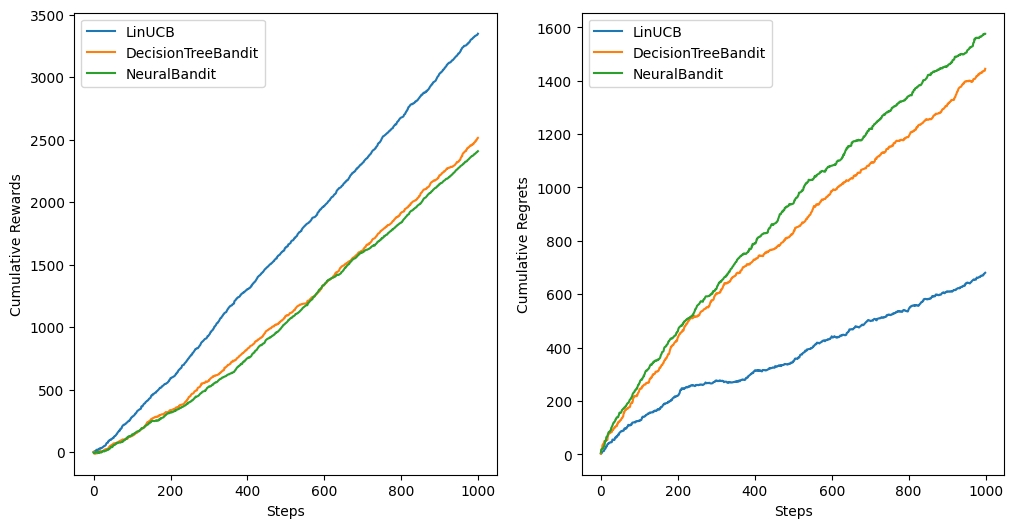

In [31]:
# Define the bandit environment
n_actions = 10
n_features = 5
bandit = Bandit(n_actions, n_features)

# Define the agents
linucb_agent = LinUCB(n_actions, n_features, alpha=0.1)
neural_agent = NeuralBandit(n_actions, n_features, learning_rate=0.01)
tree_agent = DecisionTreeBandit(n_actions, n_features, max_depth=5)

# Run the simulation for each agent
n_steps = 1000
agents = [linucb_agent, tree_agent, neural_agent]
cumulative_rewards = {agent.__class__.__name__: np.zeros(n_steps) for agent in agents}
cumulative_regrets = {agent.__class__.__name__: np.zeros(n_steps) for agent in agents}

for agent in agents:
    print(agent)

    for t in range(n_steps):
        x = np.random.randn(n_features)
        pred_rewards = agent.predict([x])
        action = np.argmax(pred_rewards)
        reward = bandit.get_reward(action, x)
        optimal_reward = bandit.get_optimal_reward(x)
        agent.update(action, x, reward)

        cumulative_rewards[agent.__class__.__name__][t] = (
            reward
            if t == 0
            else cumulative_rewards[agent.__class__.__name__][t - 1] + reward
        )

        cumulative_regrets[agent.__class__.__name__][t] = (
            optimal_reward - reward
            if t == 0
            else cumulative_regrets[agent.__class__.__name__][t - 1]
            + optimal_reward
            - reward
        )

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(121)
for agent_name, rewards in cumulative_rewards.items():
    plt.plot(rewards, label=agent_name)
plt.xlabel("Steps")
plt.ylabel("Cumulative Rewards")
plt.legend()

plt.subplot(122)
for agent_name, regrets in cumulative_regrets.items():
    plt.plot(regrets, label=agent_name)
plt.xlabel("Steps")
plt.ylabel("Cumulative Regrets")
plt.legend()

plt.show()

# Optional: advanced exampls of cMAB

In [32]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

## Contextual Bandit with function approximation



https://subscription.packtpub.com/book/data/9781838644147

Mastering Reinforcement Learning with Python By Enes Bilgin December 2020

In [33]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy import stats
# import plotly.offline
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import cufflinks as cf

cf.go_offline()
cf.set_config_file(world_readable=True, theme='white')

In [34]:
class UserGenerator(object):

    def __init__(self):
        self.beta = {}
        self.beta['A'] = np.array([-4, -0.1, -3, 0.1])
        self.beta['B'] = np.array([-6, -0.1, 1, 0.1])
        self.beta['C'] = np.array([2, 0.1, 1, -0.1])
        self.beta['D'] = np.array([4, 0.1, -3, -0.2])
        self.beta['E'] = np.array([-0.1, 0, 0.5, -0.01])
        self.context = None

    def logistic(self, beta, context):
        f = np.dot(beta, context)
        p = 1 / (1 + np.exp(-f))
        return p

    def display_ad(self, ad):
        if ad in ['A', 'B', 'C', 'D', 'E']:
            p = self.logistic(self.beta[ad], self.context)
            reward = np.random.binomial(n=1, p=p)
            return reward
        else:
            raise Exception('Unknown ad!')

    def generate_user_with_context(self):
        # 0: International, 1: U.S.
        location = np.random.binomial(n=1, p=0.6)
        # 0: Desktop, 1: Mobile
        device = np.random.binomial(n=1, p=0.8)
        # User age changes between 10 and 70,
        # with mean age 34
        age = 10 + int(np.random.beta(2, 3) * 60)
        # Add 1 to the concept for the intercept
        self.context = [1, device, location, age]
        return self.context

In [35]:
def get_scatter(x, y, name, showlegend):
    dashmap = {'A': 'solid',
               'B': 'dot',
               'C': 'dash',
               'D': 'dashdot',
               'E': 'longdash'}
    s = go.Scatter(x=x,
                   y=y,
                   legendgroup=name,
                   showlegend=showlegend,
                   name=name,
                   line=dict(color='blue',
                             dash=dashmap[name]))
    return s

In [36]:
def visualize_bandits(ug):
    ad_list = 'ABCDE'
    ages = np.linspace(10, 70)
    fig = make_subplots(rows=2, cols=2,
            subplot_titles=("Desktop, International",
                            "Desktop, U.S.",
                            "Mobile, International",
                            "Mobile, U.S."))
    for device in [0, 1]:
        for loc in [0, 1]:
            showlegend = (device == 0) & (loc == 0)
            for ad in ad_list:
                probs = [ug.logistic(ug.beta[ad],
                          [1, device, loc, age])
                                 for age in ages]
                fig.add_trace(get_scatter(ages,
                                          probs,
                                          ad,
                                          showlegend),
                           row=device+1,
                           col=loc+1)
    fig.update_layout(template="presentation")
    fig.show()

In [37]:
configure_plotly_browser_state()
#init_notebook_mode(connected=False)

ug = UserGenerator()
visualize_bandits(ug)

In [38]:
class RegularizedLR(object):

    def __init__(self, name, alpha, rlambda, n_dim):
        self.name = name
        self.alpha = alpha
        self.rlambda = rlambda
        self.n_dim = n_dim
        self.m = np.zeros(n_dim)
        self.q = np.ones(n_dim) * rlambda
        self.w = self.get_sampled_weights()

    def get_sampled_weights(self):
        w = np.random.normal(self.m, self.alpha * self.q**(-1/2))
        return w

    def loss(self, w, *args):
        X, y = args
        n = len(y)
        regularizer = 0.5 * np.dot(self.q, (w - self.m)**2)
        pred_loss = sum([np.log(1 + np.exp(np.dot(w, X[j])))
                                    - y[j] * np.dot(w, X[j]) for j in range(n)])
        return regularizer + pred_loss

    def fit(self, X, y):
        if y:
            X = np.array(X)
            y = np.array(y)
            minimization = minimize(self.loss,
                                    self.w,
                                    args=(X, y),
                                    method="L-BFGS-B",
                                    bounds=[(-10,10)]*3 + [(-1, 1)],
                                    options={'maxiter': 50})
            self.w = minimization.x
            self.m = self.w
            p = (1 + np.exp(-np.matmul(self.w, X.T)))**(-1)
            self.q = self.q + np.matmul(p * (1 - p), X**2)

    def calc_sigmoid(self, w, context):
        return 1 / (1 + np.exp(-np.dot(w, context)))

    def get_ucb(self, context):
        pred = self.calc_sigmoid(self.m, context)
        confidence = self.alpha * np.sqrt(np.sum(np.divide(np.array(context)**2, self.q)))
        ucb = pred + confidence
        return ucb

    def get_prediction(self, context):
        return self.calc_sigmoid(self.m, context)

    def sample_prediction(self, context):
        w = self.get_sampled_weights()
        return self.calc_sigmoid(w, context)

In [39]:
def calculate_regret(ug, context, ad_options, ad):
    action_values = {a: ug.logistic(ug.beta[a], context) for a in ad_options}
    best_action = max(action_values, key=action_values.get)
    regret = action_values[best_action] - action_values[ad]
    return regret, best_action

In [40]:
def select_ad_eps_greedy(ad_models, context, eps):
    if np.random.uniform() < eps:
        return np.random.choice(list(ad_models.keys()))
    else:
        predictions = {ad: ad_models[ad].get_prediction(context)
                       for ad in ad_models}
        max_value = max(predictions.values());
        max_keys = [key for key, value in predictions.items() if value == max_value]
        return np.random.choice(max_keys)

def select_ad_ucb(ad_models, context):
    ucbs = {ad: ad_models[ad].get_ucb(context)
                   for ad in ad_models}
    max_value = max(ucbs.values());
    max_keys = [key for key, value in ucbs.items() if value == max_value]
    return np.random.choice(max_keys)

def select_ad_thompson(ad_models, context):
    samples = {ad: ad_models[ad].sample_prediction(context)
                   for ad in ad_models}
    max_value = max(samples.values());
    max_keys = [key for key, value in samples.items() if value == max_value]
    return np.random.choice(max_keys)

In [41]:
ad_options = ['A', 'B', 'C', 'D', 'E']
exploration_data = {}
data_columns = ['context',
                'ad',
                'click',
                'best_action',
                'regret',
                'total_regret']
exploration_strategies = ['eps-greedy',
                          'ucb',
                          'Thompson']

for strategy in exploration_strategies:
    print("--- Now using", strategy)
    np.random.seed(0)
    # Create the LR models for each ad
    alpha, rlambda, n_dim = 0.5, 0.5, 4
    ad_models = {ad: RegularizedLR(ad,
                                   alpha,
                                   rlambda,
                                   n_dim)
                 for ad in 'ABCDE'}
    # Initialize data structures
    X = {ad: [] for ad in ad_options}
    y = {ad: [] for ad in ad_options}
    results = []
    total_regret = 0

    for i in range(10**3):
        context = ug.generate_user_with_context()
        if strategy == 'eps-greedy':
            eps = 0.1
            ad = select_ad_eps_greedy(ad_models,
                                      context,
                                      eps)
        elif strategy == 'ucb':
            ad = select_ad_ucb(ad_models, context)
        elif strategy == 'Thompson':
            ad = select_ad_thompson(ad_models, context)
        # Display the selected ad
        click = ug.display_ad(ad)
        # Store the outcome
        X[ad].append(context)
        y[ad].append(click)
        regret, best_action = calculate_regret(ug,
                                               context,
                                               ad_options,
                                               ad)
        total_regret += regret
        results.append((context,
                        ad,
                        click,
                        best_action,
                        regret,
                        total_regret))
        # Update the models with the latest batch of data
        if (i + 1) % 500 == 0:
            print("Updating the models at i:", i + 1)
            for ad in ad_options:
                ad_models[ad].fit(X[ad], y[ad])
            X = {ad: [] for ad in ad_options}
            y = {ad: [] for ad in ad_options}

    exploration_data[strategy] = {'models': ad_models,
                                  'results': pd.DataFrame(results,
                                         columns=data_columns)}

--- Now using eps-greedy
Updating the models at i: 500
Updating the models at i: 1000
--- Now using ucb
Updating the models at i: 500
Updating the models at i: 1000
--- Now using Thompson
Updating the models at i: 500
Updating the models at i: 1000


In [42]:
configure_plotly_browser_state()

df_regret_comparisons = pd.DataFrame({s: exploration_data[s]['results'].total_regret
                                     for s in exploration_strategies})
df_regret_comparisons.iplot(dash=['solid', 'dash','dot'],
                            xTitle='Impressions',
                            yTitle='Total Regret',
                            color='black')

In [43]:
exploration_data['eps-greedy']['models']['A'].n_dim

4

In [44]:
configure_plotly_browser_state()

lrmodel = exploration_data['eps-greedy']['models']['B']
df_beta_dist = pd.DataFrame([], index=np.arange(-6,3,0.01))
mean = lrmodel.m
std_dev = lrmodel.q ** (-1/2)

for i in range(lrmodel.n_dim):
    df_beta_dist['beta_'+str(i)] = stats.norm(loc=mean[i],
                                              scale=std_dev[i]).pdf(df_beta_dist.index)

df_beta_dist.iplot(dash=['dashdot','dot', 'dash', 'solid'],
                   yTitle='p.d.f.',
                   color='black')